In [2]:
# put all RGB values into a 2D array 
# loop through array?
# use array to create map of greenness, snow, or whatever Paul wants
# use im.getdata?

In [143]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math
import scipy
import sklearn
import tesseract

SyntaxError: invalid syntax (__init__.py, line 34)

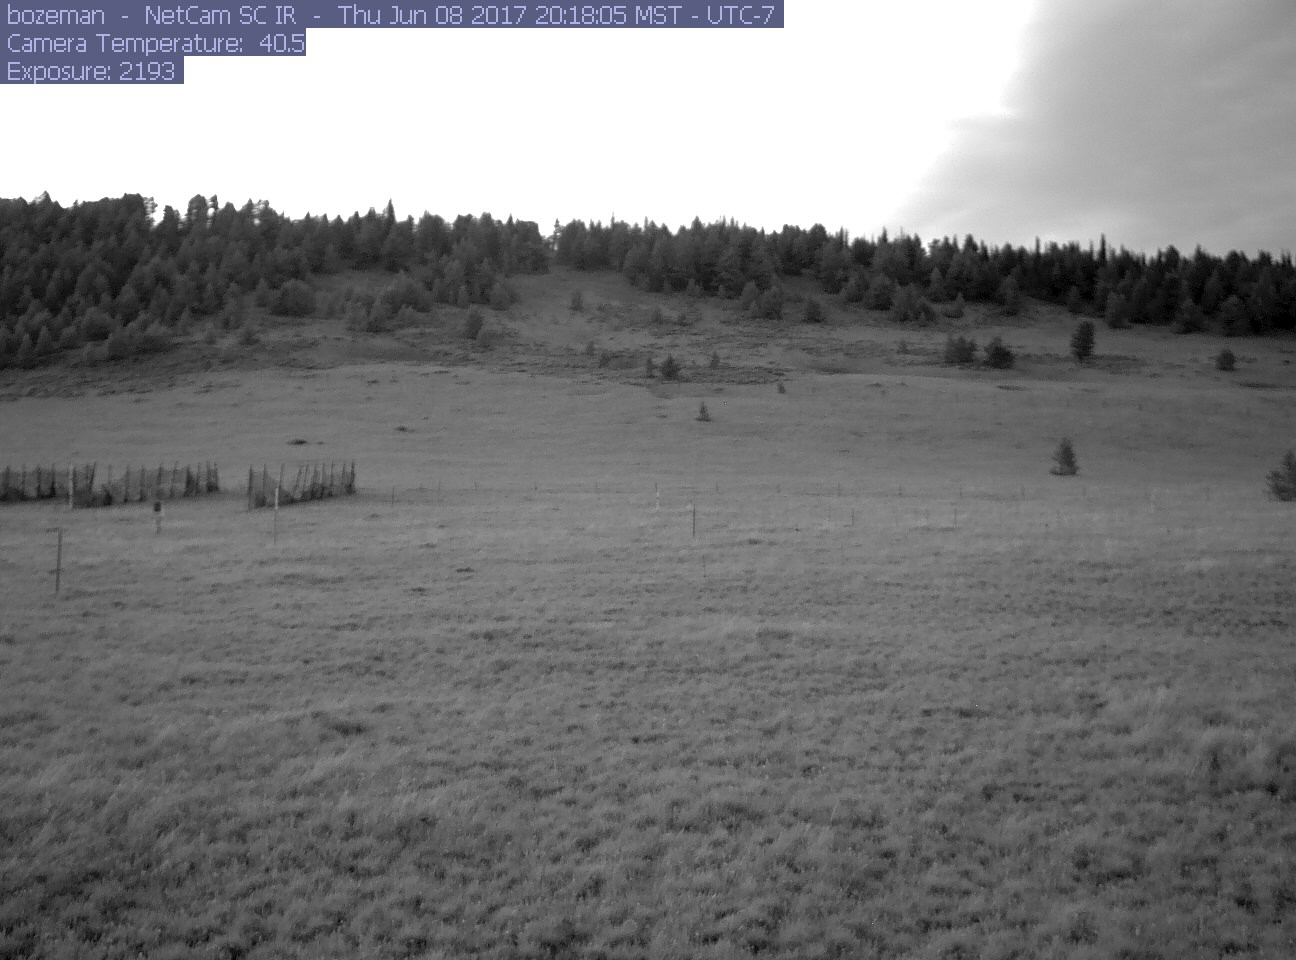

In [355]:
# shows IR photo

ir_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_08_201805.jpg'
response = requests.get(ir_test_photo)
IR_img = Image.open(BytesIO(response.content))
IR_img

In [356]:
photo = requests.get('https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/')

In [357]:
photo

<Response [403]>

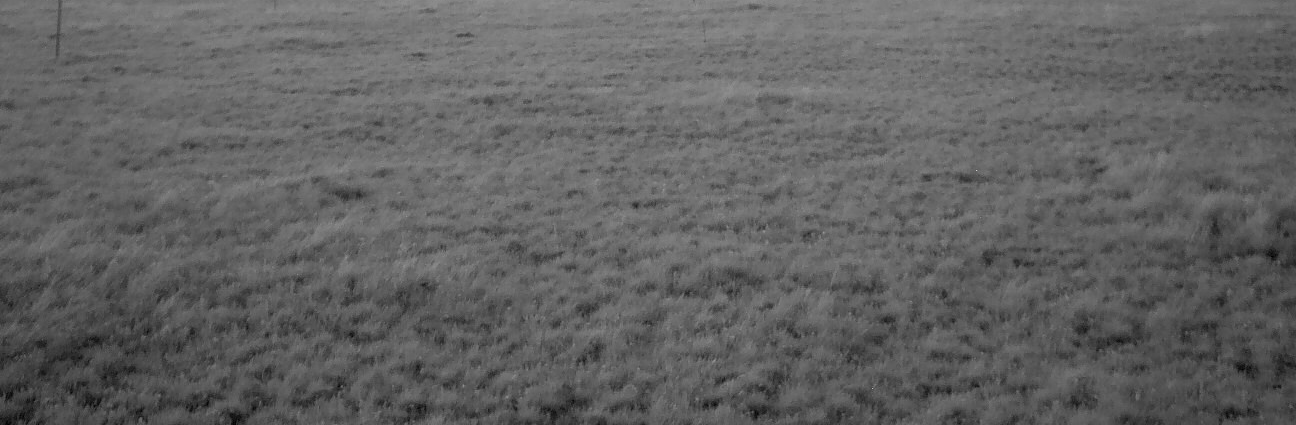

In [358]:
# crops photo

width = IR_img.size[0]
height = IR_img.size[1]
chop_IR_img = IR_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
chop_IR_img

In [359]:
# finds all pixel values for IR image

width, height = chop_IR_img.size
IR_pixel_values = list(chop_IR_img.getdata())
IR_pixel_values = np.array(IR_pixel_values).reshape((width, height, 3))

In [360]:
# averages all IR pixel data (returns a single number)

x = (np.average(IR_pixel_values, axis=0))
y = np.average(x, axis=0)
IR_ave = np.average(y, axis=0)

In [361]:
#break

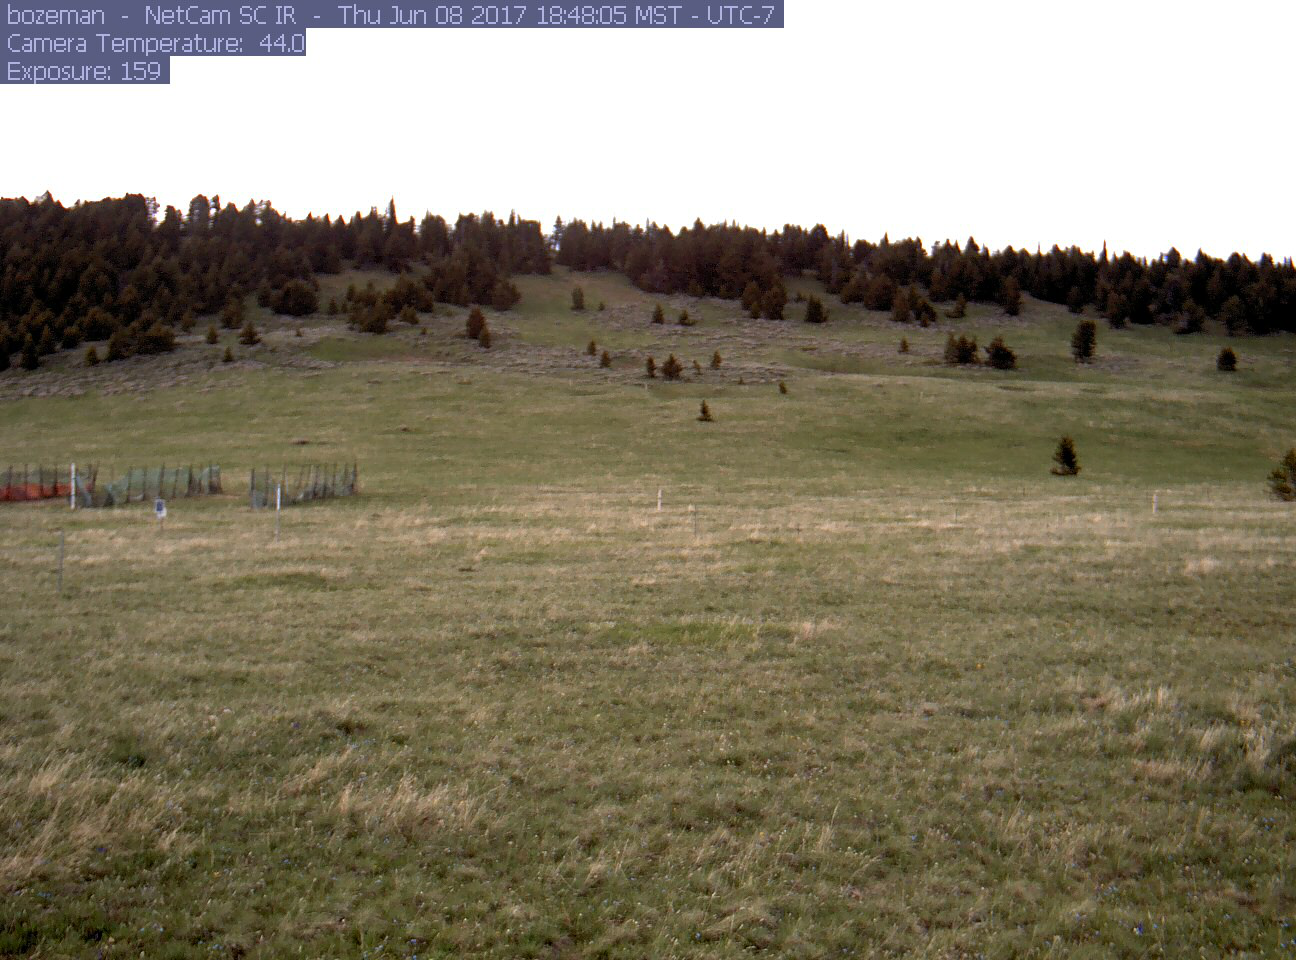

In [362]:
# shows visual photo

vis_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_08_184805.jpg'
response = requests.get(vis_test_photo)
VIS_img = Image.open(BytesIO(response.content))
VIS_img

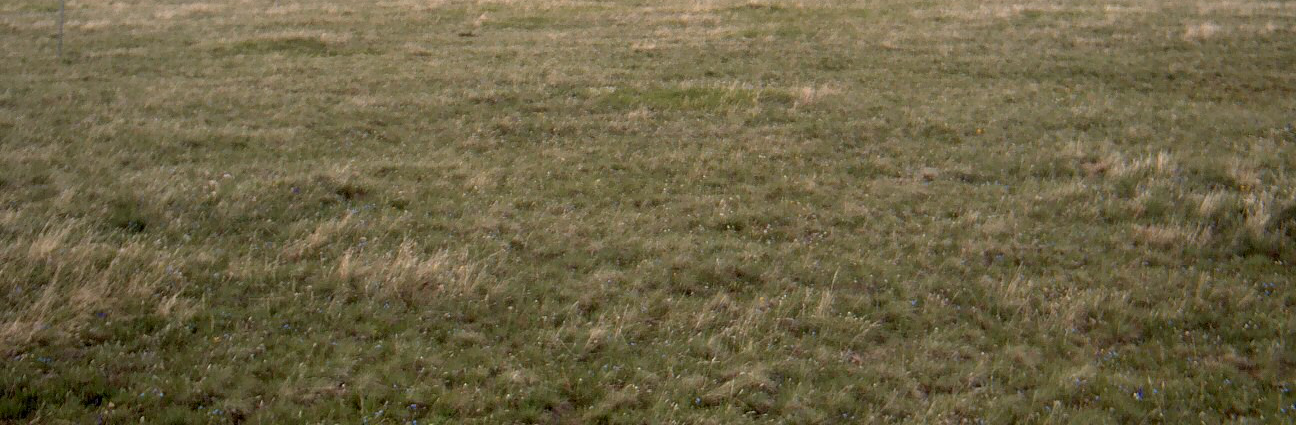

In [322]:
# crops photo

width = VIS_img.size[0]
height = VIS_img.size[1]
chop_vis_img = VIS_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
chop_vis_img

In [323]:
chop_vis_img.size

(1296, 425)

In [324]:
# finds all pixel values for visual image

width, height = chop_vis_img.size
vis_pixel_values = list(chop_vis_img.getdata())
vis_pixel_values = np.array(vis_pixel_values).reshape((width, height, 3))
#vis_pixel_values

In [325]:
vis_pixel_values.shape

(1296, 425, 3)

In [326]:
# averages all visual pixel data (returns red average)
x = (np.average(vis_pixel_values, axis=0))
r_ave = np.average(x, axis=0)
red_ave = r_ave.item(0)
red_ave

108.94974037763257

In [327]:
# averages all visual pixel data (returns green average)

x = (np.average(vis_pixel_values, axis=1))
g_ave = np.average(x, axis=1)
green_ave = g_ave.item(1)
green_ave

141.70117647058822

In [328]:
# averages all viusal pixel data (returns blue average)

x = (np.average(vis_pixel_values, axis = 2))
b_ave = np.average(x, axis = 1)
blue_ave = b_ave.item(2)
blue_ave

130.00392156862748

In [329]:
#break

In [330]:
# calculates average NDVI?

ndvi = (IR_ave - red_ave)/(IR_ave + red_ave)
ndvi

-0.047407208198878406

In [331]:
# calculates green chromatic coodinate

gcc = green_ave/(red_ave+blue_ave+green_ave)
gcc

0.37225633873439384

In [332]:
# calculates excess green

eg = 2*green_ave-(red_ave+blue_ave)
eg

44.448690994916404

In [333]:
# calculating all red values 

x=0
y=0
width,height = chop_vis_img.size
red_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        red_array[x,y] = vis_pixel_values[x,y,0]
#red_array

In [334]:
red_array.shape

(1296, 425)

In [335]:
# finding r'
r_prime = red_array/math.sqrt(159)
#r_prime

In [336]:
# calculating all green values 

x=0
y=0
width,height = chop_vis_img.size
green_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        green_array[x,y] = vis_pixel_values[x,y,1]
#green_array

In [337]:
# finding g'
g_prime = green_array/math.sqrt(159)
#g_prime

In [338]:
# calculating all blue values

x=0
y=0
width,height = chop_vis_img.size
blue_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        blue_array[x,y] = vis_pixel_values[x,y,2]
#blue_array

In [339]:
# finding b'
b_prime = blue_array/math.sqrt(159)
#b_prime

In [340]:
# calculating all IR values

x=0
y=0
width,height = chop_IR_img.size
IR_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        IR_array[x,y] = IR_pixel_values[x,y,0]
#IR_array

In [341]:
# finding z' RGB+IR????

z = (red_array + green_array + blue_array) + IR_array

z_prime = z/math.sqrt(2193)
z_prime

array([[  8.99006393,   9.24631278,   9.28902092, ...,  11.55255246,
         11.78744724,  12.2572368 ],
       [ 11.53119839,  11.72338503,  12.2572368 , ...,  10.89057625,
         11.04005475,  10.33537041],
       [ 10.07912155,  10.33537041,  10.4848489 , ...,   8.62704472,
          8.92600171,   8.79787729],
       ..., 
       [  4.05727351,   3.88644094,   3.45935952, ...,   6.64111611,
          6.51299168,   7.19632196],
       [  7.36715453,   5.80830734,   6.64111611, ...,   6.49163761,
          4.84737414,   6.44892947],
       [  7.28173824,   6.70517832,   7.17496789, ...,   5.12497706,
          5.33851777,   5.03956078]])

In [342]:
# finding y'

y_prime = 0.30*red_array + 0.59*green_array + 0.11*blue_array
y_prime

array([[ 115.29,  116.29,  115.29, ...,  142.02,  145.03,  152.03],
       [ 141.11,  144.11,  153.49, ...,  137.06,  139.17,  129.17],
       [ 124.17,  125.17,  127.17, ...,  106.96,  110.96,  109.25],
       ..., 
       [  55.42,   54.31,   49.02, ...,   82.09,   82.39,   90.32],
       [  95.33,   66.33,   84.02, ...,   81.01,   55.23,   80.74],
       [  93.96,   84.96,   93.18, ...,   72.02,   74.25,   65.92]])

In [343]:
# finding x'   X′ = Z′ −Y′   z'=z/sqrt(exposure of RGB+IR)

x_prime = z_prime - y_prime
x_prime

array([[-106.29993607, -107.04368722, -106.00097908, ..., -130.46744754,
        -133.24255276, -139.7727632 ],
       [-129.57880161, -132.38661497, -141.2327632 , ..., -126.16942375,
        -128.12994525, -118.83462959],
       [-114.09087845, -114.83462959, -116.6851511 , ...,  -98.33295528,
        -102.03399829, -100.45212271],
       ..., 
       [ -51.36272649,  -50.42355906,  -45.56064048, ...,  -75.44888389,
         -75.87700832,  -83.12367804],
       [ -87.96284547,  -60.52169266,  -77.37888389, ...,  -74.51836239,
         -50.38262586,  -74.29107053],
       [ -86.67826176,  -78.25482168,  -86.00503211, ...,  -66.89502294,
         -68.91148223,  -60.88043922]])

In [344]:
# camera NDVI

camera_ndvi = ((x_prime - r_prime)/(x_prime + r_prime))
camera_ndvi.shape

(1296, 425)

In [345]:
# average ndvi

np.mean(camera_ndvi)

1.2196814284522424

In [346]:
#normalized image

img_ave = np.mean(chop_vis_img)
normalized_image = chop_vis_img / img_ave
#normalized_image

In [347]:
# exposure number

exp_img = VIS_img.crop((118, 58, 200, 85))
exp_img

In [348]:
# returns exposure number in text 

exp_num = pt.image_to_string(exp_img,config='nobatch digits')
print (exp_num)

159 -


In [349]:
exp_num[0:4]

'159 '

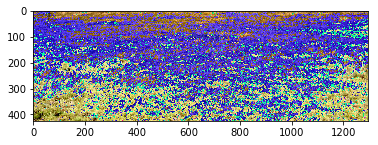

In [363]:
# image nonsense

plt.imshow(normalized_image)
plt.show()

In [374]:
camera_ndvi.mean()

1.2196814284522424

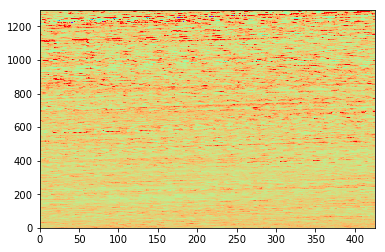

In [372]:
plt.pcolormesh(camera_ndvi, cmap=plt.cm.rainbow,vmin = 1.12, vmax=1.25)

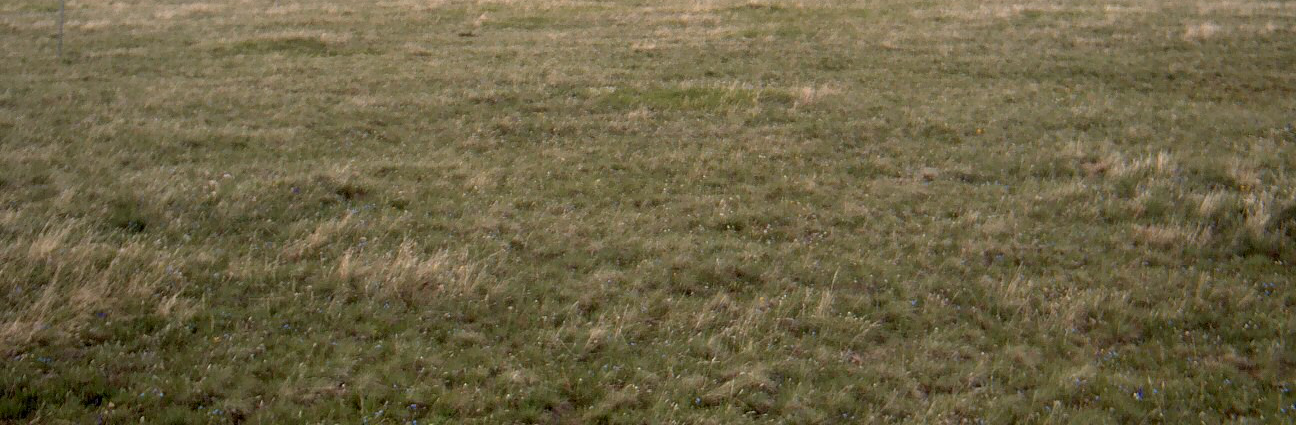

In [375]:
chop_vis_img